<a href="https://colab.research.google.com/github/martinpdab/tugasscdl/blob/main/EDA_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sklearn

In [2]:
import numpy as np
import pandas as pd

In [3]:
#memakai dataset
URL = 'https://raw.githubusercontent.com/martinpdab/tugasscdl/main/dataset.csv' 
dataframe = pd.read_csv(URL)
dataframe

,Period,TE,HU,RF,WS,PD,ABJ,LAG0,LAG1,LAG2,LAG3,LAG4,LAG5,LAG6,LAG7,LAG8,LAG9,LAG10,LAG11,LAG12,OS
0,Jan-10,26.02,84.74,10.52,0.84,792.86,86.96,1,4,6,4,4,1,4,3,3,5,2,1,4,0
1,Feb-10,26.32,84.64,12.04,0.86,793.45,86.72,3,1,4,6,4,4,1,4,3,3,5,2,1,1
2,Mar-10,26.39,85.00,8.65,0.55,794.04,86.50,0,3,1,4,6,4,4,1,4,3,3,5,2,0
3,Apr-10,26.29,86.17,10.37,0.30,794.63,86.28,1,0,3,1,4,6,4,4,1,4,3,3,5,0
4,May-10,26.57,85.61,7.35,0.58,795.22,86.08,0,1,0,3,1,4,6,4,4,1,4,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,Aug-18,24.27,76.87,0.00,1.39,846.18,96.29,1,4,3,3,5,2,1,4,1,1,1,2,3,0
104,Sep-18,25.50,75.73,0.59,1.03,846.59,93.34,4,1,4,3,3,5,2,1,4,1,1,1,2,1
105,Oct-18,26.58,74.94,0.04,1.39,847.01,96.10,4,4,1,4,3,3,5,2,1,4,1,1,1,1
106,Nov-18,26.49,82.28,10.53,1.00,847.42,96.38,6,4,4,1,4,3,3,5,2,1,4,1,1,1


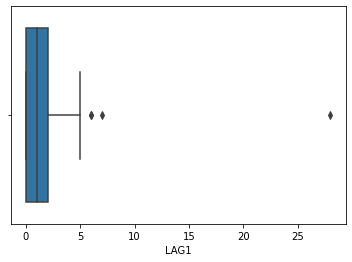

In [5]:
import seaborn as sns
sns.boxplot(x=dataframe['LAG1'])

In [6]:
dataframe.head(n=5)
dataframe.tail(n=6)

dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Period  108 non-null    object 
 1   TE      108 non-null    float64
 2   HU      108 non-null    float64
 3   RF      108 non-null    float64
 4   WS      108 non-null    float64
 5   PD      108 non-null    float64
 6   ABJ     108 non-null    float64
 7   LAG0    108 non-null    int64  
 8   LAG1    108 non-null    int64  
 9   LAG2    108 non-null    int64  
 10  LAG3    108 non-null    int64  
 11  LAG4    108 non-null    int64  
 12  LAG5    108 non-null    int64  
 13  LAG6    108 non-null    int64  
 14  LAG7    108 non-null    int64  
 15  LAG8    108 non-null    int64  
 16  LAG9    108 non-null    int64  
 17  LAG10   108 non-null    int64  
 18  LAG11   108 non-null    int64  
 19  LAG12   108 non-null    int64  
 20  OS      108 non-null    int64  
dtypes: float64(6), int64(14), object(1)
mem

In [7]:
data = dataframe[['TE', 'HU', 'RF', 'WS', 'PD', 'ABJ', 'LAG0', 'LAG1', 'LAG2', 'LAG3', 'LAG4', 'LAG5', 'LAG6', 'LAG7', 'LAG8', 'LAG9', 'LAG10', 'LAG11', 'LAG12', 'OS']]
data.head()

,TE,HU,RF,WS,PD,ABJ,LAG0,LAG1,LAG2,LAG3,LAG4,LAG5,LAG6,LAG7,LAG8,LAG9,LAG10,LAG11,LAG12,OS
0,26.02,84.74,10.52,0.84,792.86,86.96,1,4,6,4,4,1,4,3,3,5,2,1,4,0
1,26.32,84.64,12.04,0.86,793.45,86.72,3,1,4,6,4,4,1,4,3,3,5,2,1,1
2,26.39,85.00,8.65,0.55,794.04,86.50,0,3,1,4,6,4,4,1,4,3,3,5,2,0
3,26.29,86.17,10.37,0.30,794.63,86.28,1,0,3,1,4,6,4,4,1,4,3,3,5,0
4,26.57,85.61,7.35,0.58,795.22,86.08,0,1,0,3,1,4,6,4,4,1,4,3,3,0


In [8]:
#mencari z point
from scipy import stats
z = np.abs(stats.zscore(data))
print(z)


[[0.07166586 0.70474793 0.43351862 ... 0.19148759 0.79330574 0.60587838]
 [0.04017293 0.67650467 0.69624443 ... 0.13677685 0.19148759 1.65049627]
 [0.03282458 0.77818042 0.11029674 ... 1.12157019 0.13677685 0.60587838]
 ...
 [0.01287905 2.06309211 1.37790671 ... 0.19148759 0.19148759 1.65049627]
 [0.02232693 0.0099636  0.43524708 ... 0.19148759 0.19148759 1.65049627]
 [0.05906869 0.90527512 0.41450557 ... 0.79330574 0.19148759 1.65049627]]


In [9]:
#membuat fungsi mendeteksi outlier
import numpy as np
import pandas as pd
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [10]:
for header in data.columns:
  outlier = detect_outlier(data[header])
  print(outlier)

[124.89]
[124.89]
[124.89, 26.54]
[124.89, 26.54, 2.48]
[124.89, 26.54, 2.48]
[124.89, 26.54, 2.48, 52.36, 47.07, 41.78, 36.49]
[124.89, 26.54, 2.48, 52.36, 47.07, 41.78, 36.49, 28]
[124.89, 26.54, 2.48, 52.36, 47.07, 41.78, 36.49, 28, 28]
[124.89, 26.54, 2.48, 52.36, 47.07, 41.78, 36.49, 28, 28, 28]
[124.89, 26.54, 2.48, 52.36, 47.07, 41.78, 36.49, 28, 28, 28, 28]
[124.89, 26.54, 2.48, 52.36, 47.07, 41.78, 36.49, 28, 28, 28, 28, 28]
[124.89, 26.54, 2.48, 52.36, 47.07, 41.78, 36.49, 28, 28, 28, 28, 28, 28]
[124.89, 26.54, 2.48, 52.36, 47.07, 41.78, 36.49, 28, 28, 28, 28, 28, 28, 28]
[124.89, 26.54, 2.48, 52.36, 47.07, 41.78, 36.49, 28, 28, 28, 28, 28, 28, 28, 28]
[124.89, 26.54, 2.48, 52.36, 47.07, 41.78, 36.49, 28, 28, 28, 28, 28, 28, 28, 28, 28]
[124.89, 26.54, 2.48, 52.36, 47.07, 41.78, 36.49, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28]
[124.89, 26.54, 2.48, 52.36, 47.07, 41.78, 36.49, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28]
[124.89, 26.54, 2.48, 52.36, 47.07, 41.78, 36.49, 28, 28, 

In [11]:
#filter dengan z-score
filtered_entries = (z < 3).all(axis=1)

new_df = data[filtered_entries]
new_df

,TE,HU,RF,WS,PD,ABJ,LAG0,LAG1,LAG2,LAG3,LAG4,LAG5,LAG6,LAG7,LAG8,LAG9,LAG10,LAG11,LAG12,OS
0,26.02,84.74,10.52,0.84,792.86,86.96,1,4,6,4,4,1,4,3,3,5,2,1,4,0
1,26.32,84.64,12.04,0.86,793.45,86.72,3,1,4,6,4,4,1,4,3,3,5,2,1,1
2,26.39,85.00,8.65,0.55,794.04,86.50,0,3,1,4,6,4,4,1,4,3,3,5,2,0
3,26.29,86.17,10.37,0.30,794.63,86.28,1,0,3,1,4,6,4,4,1,4,3,3,5,0
4,26.57,85.61,7.35,0.58,795.22,86.08,0,1,0,3,1,4,6,4,4,1,4,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,24.27,76.87,0.00,1.39,846.18,96.29,1,4,3,3,5,2,1,4,1,1,1,2,3,0
104,25.50,75.73,0.59,1.03,846.59,93.34,4,1,4,3,3,5,2,1,4,1,1,1,2,1
105,26.58,74.94,0.04,1.39,847.01,96.10,4,4,1,4,3,3,5,2,1,4,1,1,1,1
106,26.49,82.28,10.53,1.00,847.42,96.38,6,4,4,1,4,3,3,5,2,1,4,1,1,1


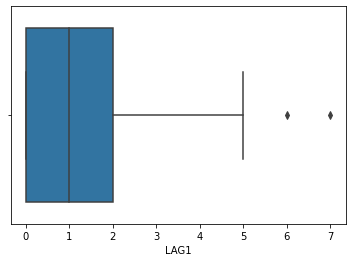

In [12]:
import seaborn as sns
sns.boxplot(x=new_df['LAG1'])

In [ ]:
new_df.to_csv('dataset_fixed.csv', index=False)